# Mudcard
- **Purely based on lecture notes: should we always apply transformer.fit or preprocessing or is it something that only has to be done in certain situations (ex. you do a histogram and find your data is not normally distributed etc)?**
    - transformer.fit(X_train) is the first step of preprocessing, transformer.transform(all other sets) is the second step.
    - preprocessing is almost always necessary, unless your data comes in a format that's directly suitable for ML algorithms (almost never the case)
- **what is the purpose for us to use Scikit-learn's pipelines?**
    - it reduces the number of lines of code you need to write
    - sklearn pipelines do a couple things in the background kinda hidden from you so make sure you understand exactly what it does before you use it to reduce the number of errors you make
- **Is there any type of continuous variable transformation that ML models work more accurately on?**
    - There is no "one transformation always improves model performance" type of solution.
    - if a continuous variable has some sort of non-Gaussian or non-uniform distribution, it might make sense to perform a transformation
    - i.e., if you apply a log transformation on an exponential distribution, the transformed feature might be a uniform distribution
    - an optimizer called gradient descent works best if all features have the same order of magnitude.
- **I was just kind of unclear about the entire lecture contents, some additional reading/review material would be helpful!**
    - some of the topics are discussed in 'Introduction to Statistical Learning'
    - if you have specific questions, feel free to come to my office hours, happy to walk through things with you
- **At the end of each preprocessing encoding, I'm a bit confused about where and how the "x_train", "x_val", "x_test" are generated.**
    - it's in the previous code cells.
    - we just use train_test_split twice on X and y as we discussed in lecture 5.
- **Since standard deviation is an universal scaler that can be applied in any conditions, so is there any advantage of using minimax over standard.**
    - not really
    - still, the minmax scaler is used by practitioners so you need to be familiar with it at the very least
    - it could be technical interview question for example to explain the similarities and differences between the minmac scaler and the standard scaler
- **"When the test set contains a feature not found in the training set, how does that affect the model performance?**
    - your validation or test sets must have the exact same features in the exact same order as the training set. 
    - if that's not the case, that is a very serious error and your model performance might suffer
- **I am confused what you mean by MinMax transforming might give values outside of 0 to 1 if the data is not i.i.d.? How does this happen?**
    - think of stock prices which might experience all time highs or all time lows
    - in this case, values in the training set might look very different from the validation or test sets.
    - we will come back to how to handle non-iid data in a few weeks
- **When doing this on my own, I was curious on the process of when to use .transform and when not to. From my understanding it is as the beginning of the code and never again, but I still feel unsure about this.**
    - we will develop our first ML pipeline from beginning to end in a week or two
    - we will put all the pieces of the puzzle together!
    - I hope it will be clear by then
- **Do we suppose to do the EDA first, then do data preprocessing?**
    - the steps need to be performed as outlined in the lecture notes
    - EDA first, then splitting, then preprocessing

# <center> Lecture 7: Linear models</center>

By the end of this lecture, you will be able to
- describe the main components of any ML algorithm
- describe how linear regression works
- describe how logistic regression works


# The supervised ML pipeline

**0. Data collection/manipulation**: you might have multiple data sources and/or you might have more data than you need
   - you need to be able to read in datasets from various sources (like csv, excel, SQL, parquet, etc)
   - you need to be able to filter the columns/rows you need for your ML model
   - you need to be able to combine the datasets into one dataframe 

**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors
   - do as much EDA as you can!
    
**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to be transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
**4. Choose an evaluation metric**: depends on the priorities of the stakeholders
   - often requires quite a bit of thinking and ethical considerations
     
<span style="background-color: #FFFF00">**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models</span>
   - start with simple models like linear or logistic regression
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation or hyperparameter tuning)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

## A few words on evaluation metrics

- we use **accuracy** as our classification metric for now
- we use **RMSE** or **MSE** as our regression metric for now
- we will have two lectures dedicated to evaluation metrics during the second half of the term

## <font color='LIGHTGRAY'>Supervised ML algorithms, part 1 </font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **describe the main components of any ML algorithm**
- <font color='LIGHTGRAY'>describe how linear regression works</font>
- <font color='LIGHTGRAY'>describe how logistic regression works</font>


## Supervised ML algorithms: three parts
- 1) **a mathematical model ($f$)** is used to convert the feature values into a prediction

$f(X_i) = y_i'$, where $i$ is the $i$th data point in our sample. $X_i$ is a vector and $y_i'$ is a number.
    - $f$ is your supervised ML algorithm
    - it usually has a number of intrinsic parameters 
- 2) the optimization algorithm minimizes a metric called **the cost/loss function**
    - the cost function is used to determine the best intrinsic parameters of one model based on the training data
    - it is not the same as the evaluation metric
        - you use the evlaution metric to compare various models
        - the model uses the cost function to find the best values of its intrinsic parameters
        - keep in mind though that the same metric can be used as the cost function and the evaluation metric (e.g., MSE in regression) but that's not necessarily the case (e.g., the cost function is MSE but you use R2 as an evaluation metric).
- 3) **an optimization algorithm** is used to determine the intrinsic parameter values given the training set and the cost/loss function
    - there are various algorithms
    - e.g., analytical solutions, brute force, gradient descent, backpropagation


## <font color='LIGHTGRAY'>Supervised ML algorithms, part 1 </font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>describe the main components of any ML algorithm</font>
- **describe how linear regression works**
- <font color='LIGHTGRAY'>describe how logistic regression works</font>


## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression # import the model
LinReg = LinearRegression() # initialize a simple linear regression model 
LinReg.fit(X_train,y_train) # we will learn now what happens when you issue this line in regression

NameError: name 'X_train' is not defined

- This is the **mathematical model**:
    ### <center>$f(X_i) = y_i' = w_0 + w_1 X_{i1} + w_2 X_{i2} +$ ... $= w_0 + \sum_{j=1}^{d} w_j  X_{ij} $</center>
    ### <center>$f(X_i) = y_i' = <w,X_i>$</center>
  
 <center>where $y_i'$ is the prediction of the linear regression model and $w$ are parameters or weights of the linear model.</center>

- The **cost function** is the mean squared error:

### <center>$MSE(y,y') = \frac{1}{m}\sum_{i=1}^{m}(y_i-y_i')^2 = \frac{1}{m}\sum_{i=1}^{m}(y_i-<w,X_i>)^2 $</center>

- We will explore two **optimizer**s:
    - brute force approach
    - least squares method 


## Let's generate some data

In [ ]:
# load packages and generate data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from sklearn.datasets import make_regression
matplotlib.rcParams.update({'font.size': 11})

# fix the seed so code is reproducable
np.random.seed(1)

# generate n_samples points
n_samples = 30

# generate data
X, y, coef = make_regression(n_samples = n_samples, n_features = 1, coef = True, noise= 10, bias=0)
print(coef) # the coefficients of the underlying linear model, the bias is 0.
print(np.dot(X,coef)[:,0]) # noise is added to the label
print(y)
df = pd.DataFrame()
df['x1'] = X[:,0]
df['y'] = y
print(df.head())
df.to_csv('../data/regression_example.csv',index=False)

28.777533858634875
[  9.18115839 -30.87739085  24.90429735  -4.96205858  32.94232532
  14.46054785 -66.23260778 -19.67600162 -11.0521372  -25.26260034
 -59.28576902 -31.67310564 -31.65215819  32.62708851  50.21137962
  -3.53647763 -26.92913658  46.7446537   42.07586066  25.94555749
 -21.90565736  15.2623224  -15.19948048  -7.70915828  16.77198455
   1.21480753  25.92441258  -7.17626442 -17.60484091  -9.27837201]
[  3.08130585 -48.2639338   25.93592732   1.87178372  45.4428258
   6.88380644 -72.44927625 -16.20740827 -12.15967691 -25.0337406
 -66.76530644 -35.83422144 -27.17695128  53.04737598  52.96856006
  10.13384942 -20.19197583  36.16208808  58.99412194  38.42855536
 -32.81240623   6.77988325 -15.82439642 -20.62478531  18.61129032
   9.78715027  31.80735422  -4.11214063 -11.04200012 -15.08634424]
         x1          y
0  0.319039   3.081306
1 -1.072969 -48.263934
2  0.865408  25.935927
3 -0.172428   1.871784
4  1.144724  45.442826


In [ ]:
def model_linreg(X,w):
    if len(np.shape(w)) != 2:
        w = np.array(w)[np.newaxis,:] # a numpy trick to make the dot product work

    y_pred = w[0,0] + w[0,1:].dot(X.T) # intercept + <w,x>
    
    return y_pred

def cost_function_MSE(X,y_true,w):
    """
    Take in a numpy array X,y_true, w and generate the cost function
    of using w as parameter in a linear regression model
    """
    m = len(y)
    w = np.array(w)[np.newaxis,:] # just a numpy trick to make the dot product work in predict
    y_pred = model_linreg(X,w)
    cost = (1/m) * np.sum(np.square(y_true-y_pred)) # this is MSE
    return cost

#### <center>$y_i' = w_0 + x_{i1} w_1$</center>
- $w_0$ is the intercept
- $w_1$ is the slope

#### We are looking for the best fit line!

For a given $w$ vector, the cost function returns the MSE.

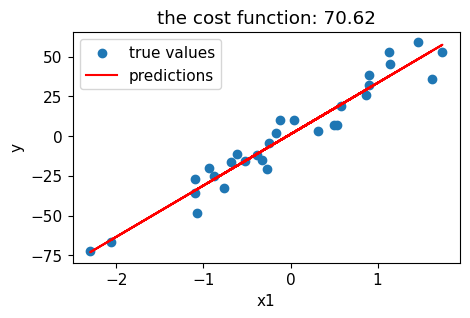

In [ ]:
w = [0, 0] # intercept is w[0], the slope is w[1]

plt.figure(figsize=(5,3))
plt.scatter(X,y,label='true values')
plt.plot(X,model_linreg(X,w),label='predictions',color='r')
plt.title('the cost function: '+str(np.around(cost_function_MSE(X,y,w),2)))
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.savefig('../figures/line_fit.png',dpi=300)
plt.show()


## What we want:
- Find the w vector that minimizes the cost function! That's our best fit model.

$${\bf w} = \text{argmin}_{\bf w} \sum_{i = 1}^{m}(y_{i} - <w,X_i>))^{2}$$

## How we do it:
- Brute force approach
   - create a grid of w[0] and w[1] values
   - loop through all w vectors on the grid
   - find the w vector that comes with the smallest cost

In [ ]:
n_vals = 101

w0 = np.linspace(-100,100,n_vals) # the intercept values to explore
w1 = np.linspace(-100,100,n_vals) # the slope values to explore

cost = np.zeros([len(w0),len(w1)]) # the cost function's value for each w

# loop through all intercept-slope combinations and calculate the cost function
for i in range(n_vals):
    for j in range(n_vals):
        w = [w0[i],w1[j]]
        cost[i,j] = cost_function_MSE(X,y,w)
        
print('min(cost):',np.min(cost))
min_coords = np.unravel_index(cost.argmin(),np.shape(cost))
print('best intercept:',w0[min_coords[0]])
print('best slope:',w1[min_coords[1]])


min(cost): 71.43643291686587
best intercept: 2.0
best slope: 32.0


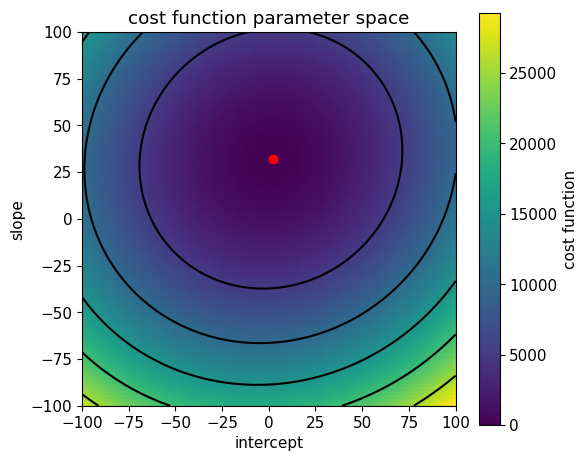

In [ ]:
plt.figure(figsize=(6,5))
ax = plt.gca()
extent = (np.min(w0),np.max(w0),np.min(w1),np.max(w1))
fig = ax.imshow(cost.T,origin='lower',extent=extent,vmin=0)
plt.colorbar(fig,label='cost function')
ax.contour(w0,w1,cost.T,levels=5,colors='black')
plt.scatter(w0[min_coords[0]],w1[min_coords[1]],c='r')
ax.xaxis.set_ticks_position("bottom")
plt.xlabel('intercept')
plt.ylabel('slope')
plt.title('cost function parameter space')
plt.tight_layout()
plt.savefig('../figures/cost_function.png',dpi=300)
plt.show()

## A much better optimizer: least squares method
- brute force is not used in practice, too computationally expensive
- linear regression can be solved analytically meaning that we can get an exact solution
- this is called the least squares method

In [ ]:
def least_squares(X,y):
    # append a column of 1s for the bias term w_0
    X_bias = np.concatenate((np.ones((X.shape[0], 1)),X), axis=1)
    # matrix A is <X.T,X>
    A = (X_bias.T).dot(X_bias)
    # vector b is <X.T,y>
    b = (X_bias.T).dot(y)
    # the optimal w is A^(-1)b
    # this is an exact solution
    w = np.linalg.inv(A).dot(b)
    return w

w = least_squares(X,y)
print(w)


[ 1.14465391 32.2485579 ]


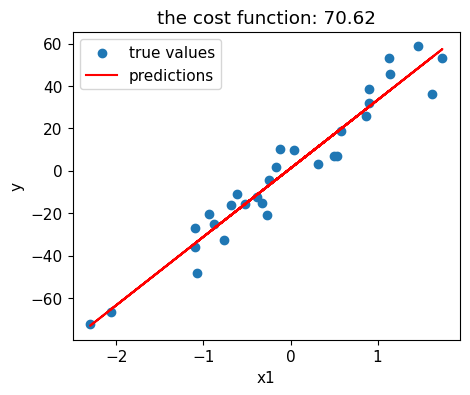

In [ ]:
# visualize the solution
plt.figure(figsize=(5,4))
plt.scatter(X,y,label='true values')
plt.plot(X,model_linreg(X,w),label='predictions',color='r')
plt.title('the cost function: '+str(np.around(cost_function_MSE(X,y,w),2)))
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.savefig('../figures/line_fit.png',dpi=300)
plt.show()


## Quiz 1

## <font color='LIGHTGRAY'>Supervised ML algorithms, part 1 </font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>describe the main components of any ML algorithm</font>
- <font color='LIGHTGRAY'>describe how linear regression works</font>
- **describe how logistic regression works**


## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression() # initialize a simple logistic regression model
LogReg.fit(X_train,y_train) # we will learn what happens when you issue this line in classification

NameError: name 'X_train' is not defined

- name is misleading, logistic regression is for classification problems!
- the model:

### <center>$y_i' = \frac{1}{1+e^{-z}}$</center>

where

### <center>$z = w_0 + \sum_{j=1}^{d} w_j  x_{ij} = <w,X_i>$</center>

$f(z) = \frac{1}{1+e^{-z}}$ is the **sigmoid function**.

- a sigmoid function is applied to the output of a linear regression model

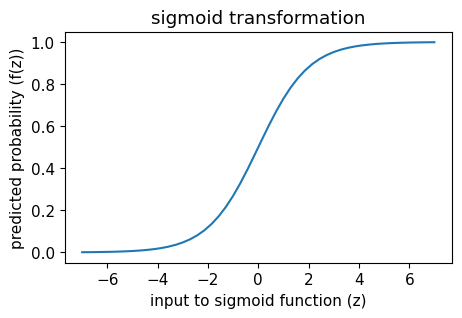

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-7,7,50)

plt.figure(figsize=(5,3))
plt.plot(z,sigmoid(z))
plt.xlabel('input to sigmoid function (z)')
plt.ylabel('predicted probability (f(z))')
plt.title('sigmoid transformation')
plt.savefig('../figures/sigmoid_trans.png',dpi=300)
plt.show()

## The cost function
- the logloss metric is used as a cost function in logistic regression

### <center>$L(w) = - \frac{1}{m}\sum_{i=1}^{m} [y_i\ln(y_i') + (1-y_i)\ln(1-y_i')]$ </center>

### <center>$L(w) =  - \frac{1}{m}\sum_{i=1}^{m} [y_i\ln(\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}}) + (1-y_i)\ln(1-\frac{1}{1+e^{-w_0 + \sum_{j=1}^{m} w_j  x_{ij}}})]$</center>

- $y_i'$ is the predicted probability of the **positive class**
- two scenarios:
   - y_true = 0 - left term disappears
   - y_true = 1 - right term disappears


# Let's generate some data!

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2,n_informative=2,n_redundant=0, 
                           n_repeated=0,n_clusters_per_class=1,class_sep=0.5,random_state=37)

df = pd.DataFrame()
df['x1'] = X[:,0]
df['x2'] = X[:,1]
df['y'] = y
print(df.head())
df.to_csv('../data/classification_example.csv',index=False)

         x1        x2  y
0  0.611204 -0.470801  1
1 -0.067366 -0.994330  1
2 -1.675834  2.040380  0
3  0.134076  1.035629  0
4  2.565181  0.843766  1


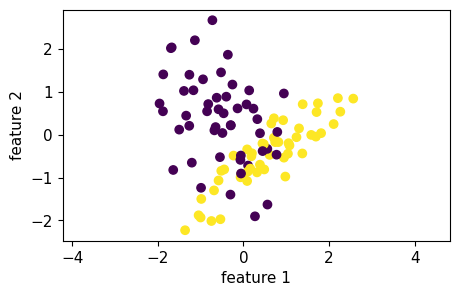

In [ ]:
plt.figure(figsize=(5,3))
plt.axis('equal')
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.savefig('../figures/classification_toy.png',dpi=300)
plt.show()

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def model_logreg(X,w):
    w = np.array(w)[np.newaxis,:]
    y_pred = sigmoid(w.dot(X.T)).ravel()
    return y_pred

def cost_function_logloss(X,y_true,w):
    """
    Take in a numpy array X,y_true, w and generate the cost function
    of using w as parameter in a linear regression model
    """
    m = len(y)
    y_pred = model_logreg(X,w)
    cost = -(1/m) * np.sum(y_true*np.log(y_pred)+ (1-y_true)*np.log(1-y_pred))
    return cost

In [ ]:

w = [1.8,-1.5] # notice that w has two components and we have two features. what does this mean?

n_vals = 31
x0 = np.linspace(-3,3,n_vals) # the intercept values to explore
x1 = np.linspace(-3,3,n_vals) # the slope values to explore

pred_prob = np.zeros([len(x0),len(x1)]) # the cost function's value for each w

# loop through all intercept-slope combinations and calculate the cost function
for i in range(n_vals):
    for j in range(n_vals):
        point = np.array([x0[i],x1[j]])[np.newaxis,:]
        pred_prob[i,j] = model_logreg(point,w)[0]
     

plt.figure(figsize=(5,4))

# visualize the predicted probabilities
xx, yy = np.meshgrid(x0,x1)
plt.contourf(xx,yy,pred_prob.T,origin='lower',vmin=0.0,vmax=1.0,levels=np.arange(0,1.01,0.01))
plt.colorbar(label='predicted probability')
plt.contour(xx, yy, pred_prob.T,vmin=0,vmax=1,levels=[0.5],colors=['w'],linewidths=4)

# add the datapoints
plt.scatter(X[:,0],X[:,1],c=y,s=50)
plt.title('the cost function: '+str(np.around(cost_function_logloss(X,y,w),4)))
plt.xlabel('feature 1')
plt.ylabel('feature 2')

# add the w vector
plt.arrow(0,0,w[0],w[1],width=0.1,length_includes_head=True,color='r',label='w vector')
plt.legend()

plt.savefig('../figures/classification_toy_model.png',dpi=300)
plt.show()


NameError: name 'np' is not defined

## Quiz 2

# Optimizer
- no exact solution like least squares because the non-linear sigmoid function complicates things

## Gradient descent
- start with arbitrary initial $w$ values and the cost function L
- repeat until convergence:
<center>$w_j := w_j - l \frac{\partial L(w)}{\partial w_j} $, </center>
<center>where $\frac{\partial L(w)}{\partial w_j}$ is the gradient of the cost function at the current $w$ location and $l$ is the learning rate.</center>

   - the gradient tells us which way the cost function is the steepest
   - the learning rate tells us how big of a step we take in that direction

In [ ]:
def gradient_descent(X,y_true,w,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X
    y    = Vector of Y
    w = Vector of ws
    learning_rate 
    iterations = no of iterations
    
    Returns the final w vector and array of cost history over no of iterations
    '''
    m = len(y_true)

    cost_history = np.zeros(iterations)
    w_history = np.zeros([iterations+1,np.shape(w)[0]])
    w_history[0] = w
    
    for it in range(iterations):

        # calculate gradients here
        # predict
        y_pred = model_logreg(X, w)
        # error
        error = y_pred - y_true
        # gradient of log‐loss w.r.t. w
        delta_w = (1/m) * X.T.dot(error)
        # gradient step
        w = w - learning_rate * delta_w

        # update histories
        w_history[it+1] = w
        cost_history[it] = cost_function_logloss(X,y_true,w)
        
    return w, cost_history, w_history

In [ ]:
w,cost_history,w_hist = gradient_descent(X,y,[-10,-10],0.02,10000)
print(w) # this is w once the iteration is completed

NameError: name 'X' is not defined

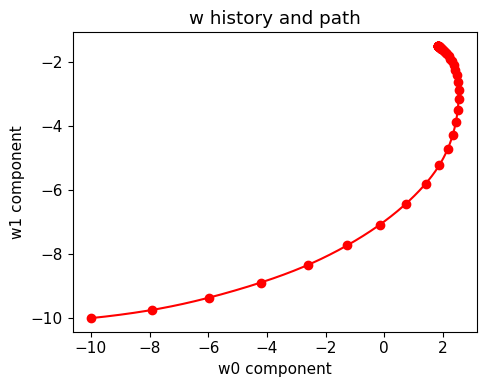

In [ ]:
plt.figure(figsize=(5,4))

plt.plot(w_hist[:,0],w_hist[:,1],color='r',label='path')
plt.scatter(w_hist[::200,0],w_hist[::200,1],c='r')
plt.xlabel('w0 component')
plt.ylabel('w1 component')
plt.title('w history and path')
plt.tight_layout()
plt.savefig('../figures/gradient_path.png',dpi=300)
plt.show()

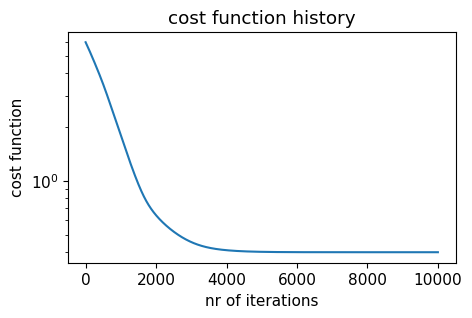

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(cost_history)
plt.semilogy()
plt.ylabel('cost function')
plt.xlabel('nr of iterations')
plt.title('cost function history')
plt.savefig('../figures/cost_hist.png',dpi=300)
plt.show()

### DO NOT USE MY `gradient_descent` FUNCTION!
- it is for illustration purposes only
- it is much slower than the sklearn implemementation!

## Mud card